In [1]:
# Import libraries
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel
import pyLDAvis.gensim

C:\Program Files\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Program Files\Anaconda3\lib\site-packages\sklearn\decomposition\nmf.py:742: DeprecationWarning: invalid escape sequence \s
  """
C:\Program Files\Anaconda3\lib\site-packages\sklearn\decomposition\nmf.py:975: DeprecationWarning: invalid escape sequence \s
  """
C:\Program Files\Anaconda3\lib\site-packages\sklearn\decomposition\nmf.py:1278: DeprecationWarning: invalid escape sequence \s
  """
C:\Program Files\Anaconda3\lib\site-packages\sklearn\manifold\t_sne.py:475: DeprecationWarning: invalid escape sequence \s
  """


In [14]:
# User-Entered Parameters
textfile = "winemag-data_first150k.csv"
textcolumn = "description"
lowercase = True 
strip_non_alpha = True
remove_stopwords = True
use_default_stopwords = True
user_defined_stopwords = ["camille"]
lemmatize_stem_algorithm = "wordnet" #other options are "porter" and "none"
number_top_words = 30
number_topics = 15

In [15]:
# Read file and create pandas dataframe
df = pd.read_csv(textfile,header=0)

#print(df)

In [16]:
# Create list of text column values
doc = pd.Series.tolist(df[textcolumn])

#print(doc)

In [17]:
# Create sentence and word tokens using NLTK tokenizers
sentences = [sent_tokenize(i) for i in doc]
tokenized_sentences = [word_tokenize(i) for i in doc]
words= []
for s in sentences:
    for i in s:
        words += word_tokenize(i)  
        
#print("Some tokenized sentences:",tokenized_sentences[:2])
#print("\nSome sentences:",sentences[:2])
#print("\nSome words:",words[:5])
#counts = Counter(words)
#counts.most_common(10)
#counts = Counter(words)
#counts.most_common(10) 

In [18]:
# Lowercase word tokens
if lowercase == True:
    words = [w.lower() for w in words]
    tokenized_sentences = [[w.lower() for w in s] for s in tokenized_sentences]
    
#print(words)
#print(tokenized_sentences)
#counts = Counter(words)
#counts.most_common(10) 

In [19]:
# Strip non-alphabetic tokens
if strip_non_alpha == True:
    words = [w for w in words if w.isalpha()]
    tokenized_sentences = [[w for w in s if w.isalpha()] for s in tokenized_sentences]
    
#print(words)
#print(tokenized_sentences)
#counts = Counter(words)
#counts.most_common(10) 

In [20]:
# Remove stopwords from tokens
if use_default_stopwords == True:
    stopwords_all = stopwords.words('english')+user_defined_stopwords
    stopwords_all = [sw for sw in stopwords_all if sw not in ["not","no"]] #modification to keep in negatives
else:
    stopwords_all = user_defined_stopwords    

if remove_stopwords == True:
    words = [w for w in words if w not in stopwords_all]
    tokenized_sentences = [[w for w in s if w not in stopwords_all] for s in tokenized_sentences]
      
#print(stopwords.words('english'))
#print(stopwords_all)
#print(words)
#print(tokenized_sentences)
#counts = Counter(words)
#counts.most_common(10) 

In [21]:
# Stem/lemmatize word tokens
if lemmatize_stem_algorithm == "wordnet":
    wordnet_lemmatizer = WordNetLemmatizer() 
    words = [wordnet_lemmatizer.lemmatize(w) for w in words]
    tokenized_sentences = [[wordnet_lemmatizer.lemmatize(w) for w in s] for s in tokenized_sentences]
elif lemmatize_stem_algorithm == "porter":
    porter = PorterStemmer() 
    words = [porter.stem(w) for w in words]
    tokenized_sentences = [[porter.stem(w) for w in s] for s in tokenized_sentences]
else:
    words = words
    
#print(words)
#print(tokenized_sentences)
#counts = Counter(words)
#counts.most_common(10) 

In [22]:
# Create Unsupervised Topic Models using Gensim
dictionary = corpora.Dictionary(tokenized_sentences)
doc_term_matrix = [dictionary.doc2bow(s) for s in tokenized_sentences]
model= LdaModel(doc_term_matrix, num_topics=number_topics, id2word = dictionary)

#print(dictionary)

In [23]:
# Top Words List
counts = Counter(words) #count words
counts.most_common(number_top_words) #display most common

[('wine', 95145),
 ('flavor', 84695),
 ('fruit', 68743),
 ('finish', 43314),
 ('cherry', 38496),
 ('aroma', 37059),
 ('tannin', 33696),
 ('acidity', 32603),
 ('palate', 29106),
 ('ripe', 26718),
 ('spice', 26198),
 ('black', 24576),
 ('note', 24566),
 ('drink', 24157),
 ('dry', 22984),
 ('sweet', 21292),
 ('rich', 21178),
 ('berry', 20323),
 ('red', 19692),
 ('oak', 19682),
 ('blackberry', 19324),
 ('show', 18211),
 ('soft', 17744),
 ('fresh', 17662),
 ('good', 17346),
 ('nose', 15891),
 ('year', 15692),
 ('plum', 15298),
 ('blend', 14317),
 ('crisp', 13960)]

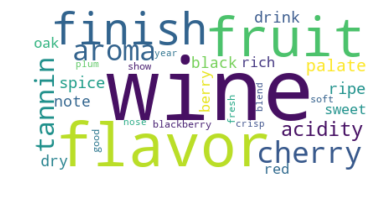

In [24]:
# Top Words Cloud
wordcloud = WordCloud(background_color="white",max_words=number_top_words)
wordcloud.fit_words(counts)

plt.figure()
plt.axis("off")
plt.imshow(wordcloud,interpolation='bilinear')
plt.show()

In [25]:
# Topic Model Visualization
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(model, doc_term_matrix, dictionary)

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
9      12.889696        1       1 -0.104813  0.061050
6      11.508087        1       2 -0.007943  0.052748
0      10.997877        1       3 -0.040204 -0.038761
1       9.205062        1       4  0.029698  0.110043
11      8.341886        1       5 -0.162468  0.148789
14      6.844173        1       6 -0.169585 -0.175924
10      6.801491        1       7 -0.194239 -0.033511
5       6.183856        1       8  0.152553  0.050968
12      5.821067        1       9 -0.149342  0.096770
4       4.661509        1      10  0.140366  0.098438
8       4.241069        1      11  0.204377 -0.026945
7       4.217309        1      12 -0.010175  0.128795
13      3.342331        1      13  0.277372  0.027632
3       2.884867        1      14 -0.111386 -0.212861
2       2.059721        1      15  0.145791 -0.287231, topic_info=     Category          Freq        Term         Total  loglift  logprob
term                                                                   
32    Default  37518.000000       aroma  37518.000000  30.0000  30.0000
31    Default  14203.000000        year  14203.000000  29.0000  29.0000
5371  Default  10638.000000    imported  10638.000000  28.0000  28.0000
89    Default  39128.000000      cherry  39128.000000  27.0000  27.0000
25    Default  35429.000000      tannin  35429.000000  26.0000  26.0000
10    Default  46924.000000      finish  46924.000000  25.0000  25.0000
30    Default  99773.000000        wine  99773.000000  24.0000  24.0000
524   Default  12863.000000       apple  12863.000000  23.0000  23.0000
173   Default  18881.000000       berry  18881.000000  22.0000  22.0000
21    Default  26495.000000      palate  26495.000000  21.0000  21.0000
43    Default  82793.000000      flavor  82793.000000  20.0000  20.0000
35    Default  16882.000000  blackberry  16882.000000  19.0000  19.0000
633   Default  10045.000000    cabernet  10045.000000  18.0000  18.0000
164   Default  27222.000000        note  27222.000000  17.0000  17.0000
19    Default  21460.000000         oak  21460.000000  16.0000  16.0000
193   Default  12488.000000      citrus  12488.000000  15.0000  15.0000
12    Default  72933.000000       fruit  72933.000000  14.0000  14.0000
240   Default  12021.000000       peach  12021.000000  13.0000  13.0000
82    Default  11145.000000       white  11145.000000  12.0000  12.0000
34    Default  21022.000000       black  21022.000000  11.0000  11.0000
707   Default  24662.000000         dry  24662.000000  10.0000  10.0000
110   Default  26323.000000     acidity  26323.000000   9.0000   9.0000
37    Default  12724.000000   chocolate  12724.000000   8.0000   8.0000
424   Default  18933.000000        nose  18933.000000   7.0000   7.0000
73    Default   8531.000000        pear   8531.000000   6.0000   6.0000
54    Default  24761.000000       spice  24761.000000   5.0000   5.0000
1140  Default   6577.000000   pineapple   6577.000000   4.0000   4.0000
367   Default  15798.000000       fresh  15798.000000   3.0000   3.0000
720   Default   6861.000000      merlot   6861.000000   2.0000   2.0000
366   Default  13365.000000       crisp  13365.000000   1.0000   1.0000
...       ...           ...         ...           ...      ...      ...
3202  Topic15    505.006798     coastal    506.757947   3.8791  -4.9804
1320  Topic15    390.371212       thyme    391.735010   3.8791  -5.2379
4631  Topic15    253.769362        palm    254.689879   3.8790  -5.6685
6181  Topic15    238.682934     piquant    239.603453   3.8788  -5.7298
4902  Topic15    237.713171       poise    238.640819   3.8787  -5.7339
449   Topic15    227.358256     hickory    228.278831   3.8786  -5.7784
7048  Topic15    239.340479     amarone    240.325871   3.8785  -5.7271
1372  Topic15    219.946680     creates    220.867260   3.8784  -5.8116
1697  Topic15    215.980635    forceful    216.901147   3.8783  -5.8298
9339  Topic15  